In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [42]:
# Upload CSV Files to work with
Top_5_GDP = "Resources/Data/Coffee_Consumption_Data/World_Statistics_International_Statistics_Chart_GDP.csv"
Top_5_Population = "Resources/Data/Coffee_Consumption_Data/World_Statistics_International_Statistics_Chart_Total_Population.csv"
Top_5_Primary_Ed_Percent_Gross = "Resources/Data/Coffee_Consumption_Data/World_Statistics_International_Statistics_Chart_School_Enrollment_Primary_Percent_Gross.csv"
Top_5_Secondary_Ed_Percent_Gross = "Resources/Data/Coffee_Consumption_Data/World_Statistics_International_Statistics_Chart_School_Enrollment_Secondary_Percent_Gross.csv"
Top_5_Tertiary_Ed_Percent_Gross = "Resources/Data/Coffee_Consumption_Data/World_Statistics_International_Statistics_Chart_School_Enrollment_Tertiary_Percent_Gross.csv"

# Read CSV Files and encode
Top_5_GDP_df = pd.read_csv(Top_5_GDP, encoding="ISO-8859-1")
Top_5_Pop_df = pd.read_csv(Top_5_Population, encoding="ISO-8859-1")
Top_5_Primary_Ed_df = pd.read_csv(Top_5_Primary_Ed_Percent_Gross, encoding="ISO-8859-1")
Top_5_Secondary_Ed_df = pd.read_csv(Top_5_Secondary_Ed_Percent_Gross, encoding="ISO-8859-1")
Top_5_Tertiary_Ed_df = pd.read_csv(Top_5_Tertiary_Ed_Percent_Gross, encoding="ISO-8859-1")

#Create DataFrames for all csv files
Top_5_GDP_df = pd.DataFrame(Top_5_GDP_df)
Top_5_Pop_df = pd.DataFrame(Top_5_Pop_df)
Top_5_Primary_Ed_df = pd.DataFrame(Top_5_Primary_Ed_df)
Top_5_Secondary_Ed_df = pd.DataFrame(Top_5_Secondary_Ed_df)
Top_5_Tertiary_Ed_df = pd.DataFrame(Top_5_Tertiary_Ed_df)

In [3]:
# Population DataFrame
Top_5_Pop_df.columns

Index(['Country', '1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016'],
      dtype='object')

In [12]:
# Population for 5 years only
Top_5_Pop_5_Years = Top_5_Pop_df[["Country", "2012", "2013", "2014", "2015", "2016"]]
Top_5_Pop_5_Years = Top_5_Pop_5_Years.set_index("Country")
Top_5_Pop_5_Years = Top_5_Pop_5_Years.T
Top_5_Pop_5_Years.head()

Country,Brazil,European Union,Japan,Philippines,United States of America,World
2012,200560983,505104333,127629000,96866642,313998379,7099548883
2013,202408632,506592460,127445000,98481032,316204908,7185078354
2014,204213133,508157249,127276000,100102249,318563456,7271228018
2015,205962108,509670169,127141000,101716359,320896618,7357369754
2016,207652865,511360932,126994511,103320222,323127513,7444027227


In [24]:
#Get the average for each country

Avg_Brazil_Pop = Top_5_Pop_5_Years["Brazil"].mean()
Avg_EU_Pop = Top_5_Pop_5_Years["European Union"].mean()
Avg_Japan_Pop = Top_5_Pop_5_Years["Japan"].mean()
Avg_Philippines_Pop = Top_5_Pop_5_Years["Philippines"].mean()
Avg_US_Pop = Top_5_Pop_5_Years["United States of America"].mean()
Avg_World_Pop = Top_5_Pop_5_Years["World"].mean()

#Create DataFrame for Averages
Average_Population = pd.DataFrame({"Brazil":[Avg_Brazil_Pop],
                                    "European Union":[Avg_EU_Pop],
                                    "Japan":[Avg_Japan_Pop],
                                    "Philippines":[Avg_Philippines_Pop],
                                    "United States of America":[Avg_US_Pop],
                                    "World":[Avg_World_Pop]})
                                    
Average_Population = Average_Population[["Brazil",
"European Union",
"Japan",
"Philippines",
"United States of America",
"World"]]

#Rename columns
Average_Population = Average_Population.rename(columns={"United States of America":"US", "European Union":"EU"})
Average_Population = Average_Population.reset_index(drop=True)

Average_Population.head()                                   

,Brazil,EU,Japan,Philippines,US,World
0,204159544.2,508177028.6,127297102.2,100097300.8,318558174.8,7.271450e+09


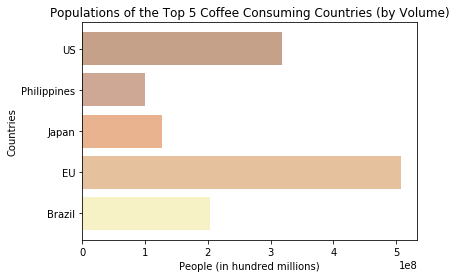

In [78]:
#Plot Data

Countries = ["Brazil", "EU", "Japan", "Philippines","US"]
Population = [204159544.2, 508177028.6, 127297102.2, 100097300.8, 318558174.8]
colors = ["khaki",  "peru", "chocolate", "sienna", "saddlebrown"]
plt.xlabel( "People (in hundred millions)" )
plt.ylabel( "Countries" )
x = range(len(Population))
plt.title("Populations of the Top 5 Coffee Consuming Countries (by Volume)")
plt.barh(Countries, Population, color=colors, alpha=0.5, align="center")
plt.savefig("C:/Users/Jill Stratton/Desktop/Project_1_Coffee_Price_Predictors/Analysis/Population.png")
plt.show()

In [47]:
# GDP DataFrame
Top_5_GDP_df.head(10)
Top_5_GDP_5_Years = Top_5_GDP_df[["Country", "2012", "2013", "2014", "2015", "2016"]]
Top_5_GDP_5_Years = Top_5_GDP_5_Years.set_index("Country")
Top_5_GDP_5_Years = Top_5_GDP_5_Years.T
Top_5_GDP_5_Years.head()

Country,Brazil,European Union,Japan,Philippines,United States of America,World
2012,2465190000000,17290200000000,6203210000000,250092000000,16155300000000,74890500000000
2013,2472810000000,18026800000000,5155720000000,271836000000,16691500000000,76993000000000
2014,2455990000000,18632300000000,4850410000000,284585000000,17427600000000,79090900000000
2015,1803650000000,16411300000000,4394980000000,292774000000,18120700000000,74781900000000
2016,1796190000000,16491300000000,4949270000000,304905000000,18624500000000,75871700000000


In [55]:
#Get the average for each country

Avg_Brazil_GDP = Top_5_GDP_5_Years["Brazil"].mean()/1000000
Avg_EU_GDP = Top_5_GDP_5_Years["European Union"].mean()/1000000
Avg_Japan_GDP = Top_5_GDP_5_Years["Japan"].mean()/1000000
Avg_Philippines_GDP = Top_5_GDP_5_Years["Philippines"].mean()/1000000
Avg_US_GDP = Top_5_GDP_5_Years["United States of America"].mean()/1000000
Avg_World_GDP = Top_5_GDP_5_Years["World"].mean()/1000000

#Create DataFrame for Averages
Average_GDP = pd.DataFrame({"Brazil":[Avg_Brazil_GDP],
                                    "European Union":[Avg_EU_GDP],
                                    "Japan":[Avg_Japan_GDP],
                                    "Philippines":[Avg_Philippines_GDP],
                                    "United States of America":[Avg_US_GDP],
                                    "World":[Avg_World_GDP]})

Average_GDP = Average_GDP[["Brazil",
"European Union",
"Japan",
"Philippines",
"United States of America",
"World"]]

#Rename columns
Average_GDP = Average_GDP.rename(columns={"United States of America":"US", "European Union":"EU"})
Average_GDP = Average_GDP.reset_index(drop=True)

Average_GDP.head()                                   

,Brazil,EU,Japan,Philippines,US,World
0,2198766.0,17370380.0,5110718.0,280838.4,17403920.0,76325600.0


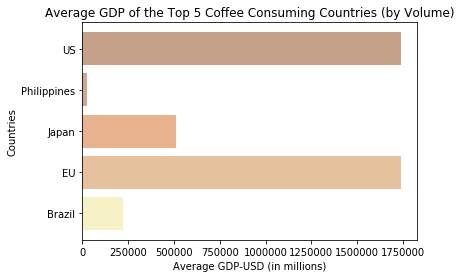

In [77]:
#Plot Data

Countries = ["Brazil", "EU", "Japan", "Philippines","US"]
GDPinMil = [219876.6, 1737038.0, 511071.8, 28083.84, 1740392.0]
colors = ["khaki",  "peru", "chocolate", "sienna", "saddlebrown"]
plt.xlabel( "Average GDP-USD (in millions)" )
plt.ylabel( "Countries" )
x = range(len(GDPinMil))
plt.title("Average GDP of the Top 5 Coffee Consuming Countries (by Volume)")
plt.barh(Countries, GDPinMil, color=colors, alpha=0.5, align="center")
plt.savefig("C:/Users/Jill Stratton/Desktop/Project_1_Coffee_Price_Predictors/Analysis/GDP.png")
plt.show()

In [67]:
Top_5_Secondary_Ed_df.head()
Top_5_2ndary = Top_5_Secondary_Ed_df[["Country","2015"]]
Top_5_2ndary = Top_5_2ndary.set_index("Country")
Top_5_2ndary = Top_5_2ndary.T
Top_5_2ndary.head()

Country,Brazil,European Union,Japan,Philippines,United States of America,World
2015,99.7,112.0,102.1,88.3,97.2,76.2


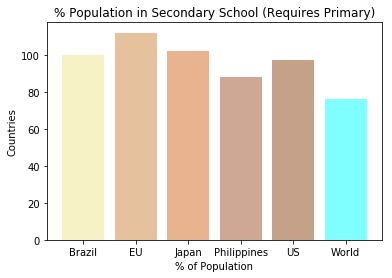

In [76]:
 #Plot Data

Countries = ["Brazil", "EU", "Japan", "Philippines","US", "World"]
Percent2ndary = [99.7, 112, 102.1, 88.3, 97.2, 76.2]
colors = ["khaki",  "peru", "chocolate", "sienna", "saddlebrown", "cyan"]
plt.xlabel( "% of Population" )
plt.ylabel( "Countries" )
x = range(len(Percent2ndary))
plt.title("% Population in Secondary School (Requires Primary)")
plt.bar(Countries, Percent2ndary, color=colors, alpha=0.5, align="center")
plt.savefig("C:/Users/Jill Stratton/Desktop/Project_1_Coffee_Price_Predictors/Analysis/Education.png")
plt.show()                  